<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module F** 
**20.1** Numerical Differentiation

**20.2** Finite Difference Approximating Derivatives

**20.3** Approximating of Higher Order Derivatives

**20.4** Numerical Differentiation with Noise


---


**Section 20.1: Numerical Differentiation**

*Summary:*

Numerical differentiation involves approximating the derivative of a function using numerical methods. Python provides several functions for generating numerical grids, with linspace being the most commonly used one for one-dimensional grids. Discretized representations of functions on a grid are useful for numerical calculations and practical for scientific and engineering applications where only discrete data is available.


---


*Implementation:*

We will use `np.linspace` for a basic framework of a numerical grid. We simply discretize 100 points between -2 and 2.



In [3]:
import numpy as np

# Define the numerical grid using linspace
a = -2
b = 2
N = 100
x = np.linspace(a, b, N)

**Section 20.2: Finite Difference Approximating Derivatives**

*Summary:*

Finite difference approximating derivatives is a numerical technique used to estimate the derivative of a function at a specific point using a numerical grid. The central difference method is one such method used for approximating derivatives, which involves computing the difference between function values at a point and its neighboring points on a numerical grid, which we already constructed.


---


*Implementation:*



Using a linspace as before we can plot the function $x^3 + x^2 -x - 1$ and calculate an approximate slope.

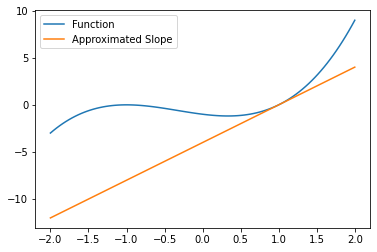

In [18]:
import matplotlib.pyplot as plt

# Define the function to approximate
def f(x):
    return x**3 + x**2 - x - 1

# Choose a point and step size
x0 = 1.0
h = 0.1

# Compute the function value at x0
f_x0 = f(x0)

# Compute the slope of the function at x0
slope = (f(x0 + h) - f(x0 - h)) / (2 * h)

# Define the x-coordinates for plotting
x_vals = np.linspace(-2, 2, 100)

# Compute the y-coordinates of the approximated slope line
slope_line = slope * (x_vals - x0) + f_x0

# Plot the function and approximated slope
plt.plot(x_vals, f(x_vals), label='Function')
plt.plot(x_vals, slope_line, label='Approximated Slope')
plt.legend()
plt.show()

We can see here that the aproximated slope line appears tangent to the original function at $x = 1$.

**Section 20.3: Approximating of Higher Order Derivatives**

*Summary:*

The Taylor series expansion of a function at at a point also provides a polynomial approximation of said function. Thus, we can use the Taylor series to approximate higher order derivatives by computing the coefficients of each corresponding term in the expansion.

---


*Implementation:*

The Taylor series gives us $f''(x_j)$ is approximately $\frac{f(x_{(j+1)} - 2f(x_j) + f(x_{(j-1)})}{h^2}$. Let's consider $sin(x)$, whose exact second derivative is $-sin(x)$. 

In [38]:
# Define function
def f(x):
    return np.sin(x)

# Define point to compute the second derivative
x_j = np.pi/4

# Define step size
h = 0.1

# Compute the second derivative approximation using the Taylor series
f_double_prime = (f(x_j + h) - 2*f(x_j) + f(x_j - h)) / h**2

# Compute using exact second derivative
exact_f_double_prime = -np.sin(x_j)

# Print results
print("Approximated f''(x_j) =", f_double_prime)
print("Exact f''(x_j) =", exact_f_double_prime)

Approximated f''(x_j) = -0.706517721919031
Exact f''(x_j) = -0.7071067811865475


Here we see the approximation was pretty close, and we can adjust the step size to get a better approximation.

**Section 20.4: Numerical Differentiation with Noise**

*Summary:*

Sometimes we need to compute a derivative when the data is corrupted by measurement errors or noise. Small amounts of noise can be effectively ignored, but if the noise is too large it can significantly affect accuracy when using numerical differentiation. 

---


*Implementation:*

Let's consider $sin(x)$, whose derivative is $cos(x)$:


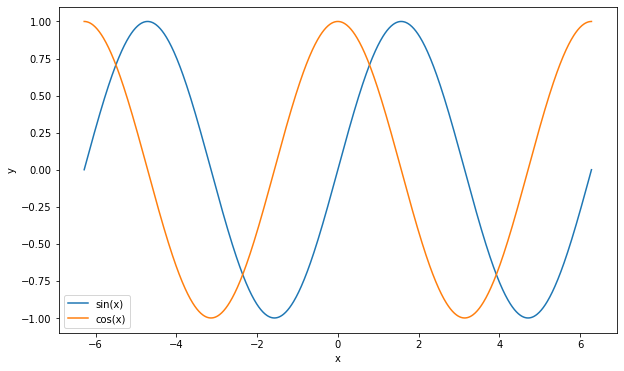

In [43]:
# Define the range of x values
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1001)

# Calculate the function and its derivative
y_vals = np.sin(x_vals)
dy_dx_vals = np.cos(x_vals)

# Plot the function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='sin(x)')
plt.plot(x_vals, dy_dx_vals, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We can add noise to the $sin(x)$ function. Adding noise over a range of $0.001$ would be sufficiently small, to demonstrate small amounts of noise.

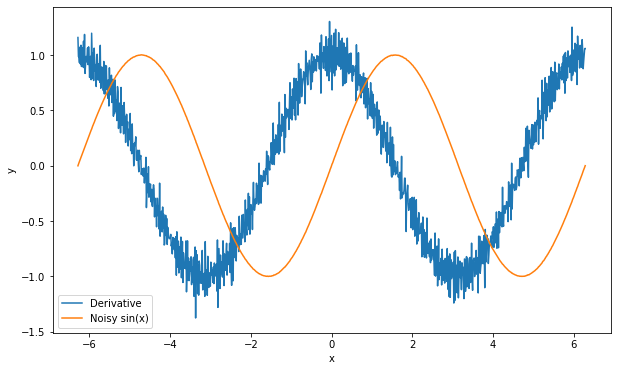

In [52]:

# Define the range of x values
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1001)

# Generate the noisy function
y_vals = np.sin(x_vals) + 0.001 * np.random.randn(len(x_vals))

# Define the step size for finite difference method
h = x_vals[1] - x_vals[0]

# Compute the derivative using a forward difference method
dy_dx_vals = np.zeros(len(y_vals))
for i in range(len(y_vals) - 1):
    dy_dx_vals[i] = (y_vals[i+1] - y_vals[i]) / h
dy_dx_vals[-1] = (y_vals[-1] - y_vals[-2]) / h


# Plot the noisy function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, dy_dx_vals, label='Derivative')
plt.plot(x_vals, y_vals, label='Noisy sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

If we overlay $cos(x)$ on the plot we can see that the derivative is still somewhat close.

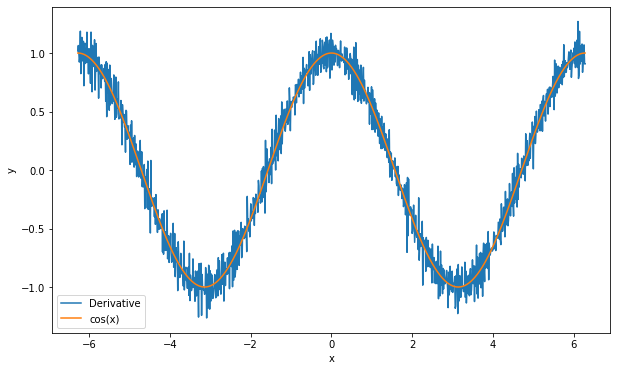

In [51]:
# Calculate cos(x)
cos_vals = np.cos(x_vals)

# Plot the noisy function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, dy_dx_vals, label='Derivative')
plt.plot(x_vals, cos_vals, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

More noise makes the approximation signficantly worse:

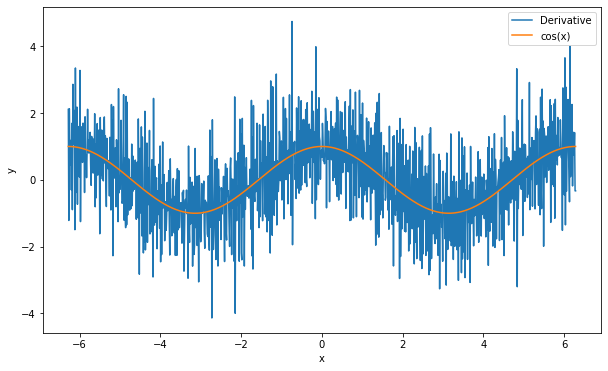

In [56]:
# Generate the noisy function
y_vals = np.sin(x_vals) + 0.01 * np.random.randn(len(x_vals))

# Compute the derivative using a forward difference method
dy_dx_vals = np.zeros(len(y_vals))
for i in range(len(y_vals) - 1):
    dy_dx_vals[i] = (y_vals[i+1] - y_vals[i]) / h
dy_dx_vals[-1] = (y_vals[-1] - y_vals[-2]) / h

# Plot the noisy function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(x_vals, dy_dx_vals, label='Derivative')
plt.plot(x_vals, cos_vals, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()